In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


6 Datas are numerical type and 9 datas are object type

In [5]:
#checking null values in each column
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

# Exploratory Data Analysis

In [6]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


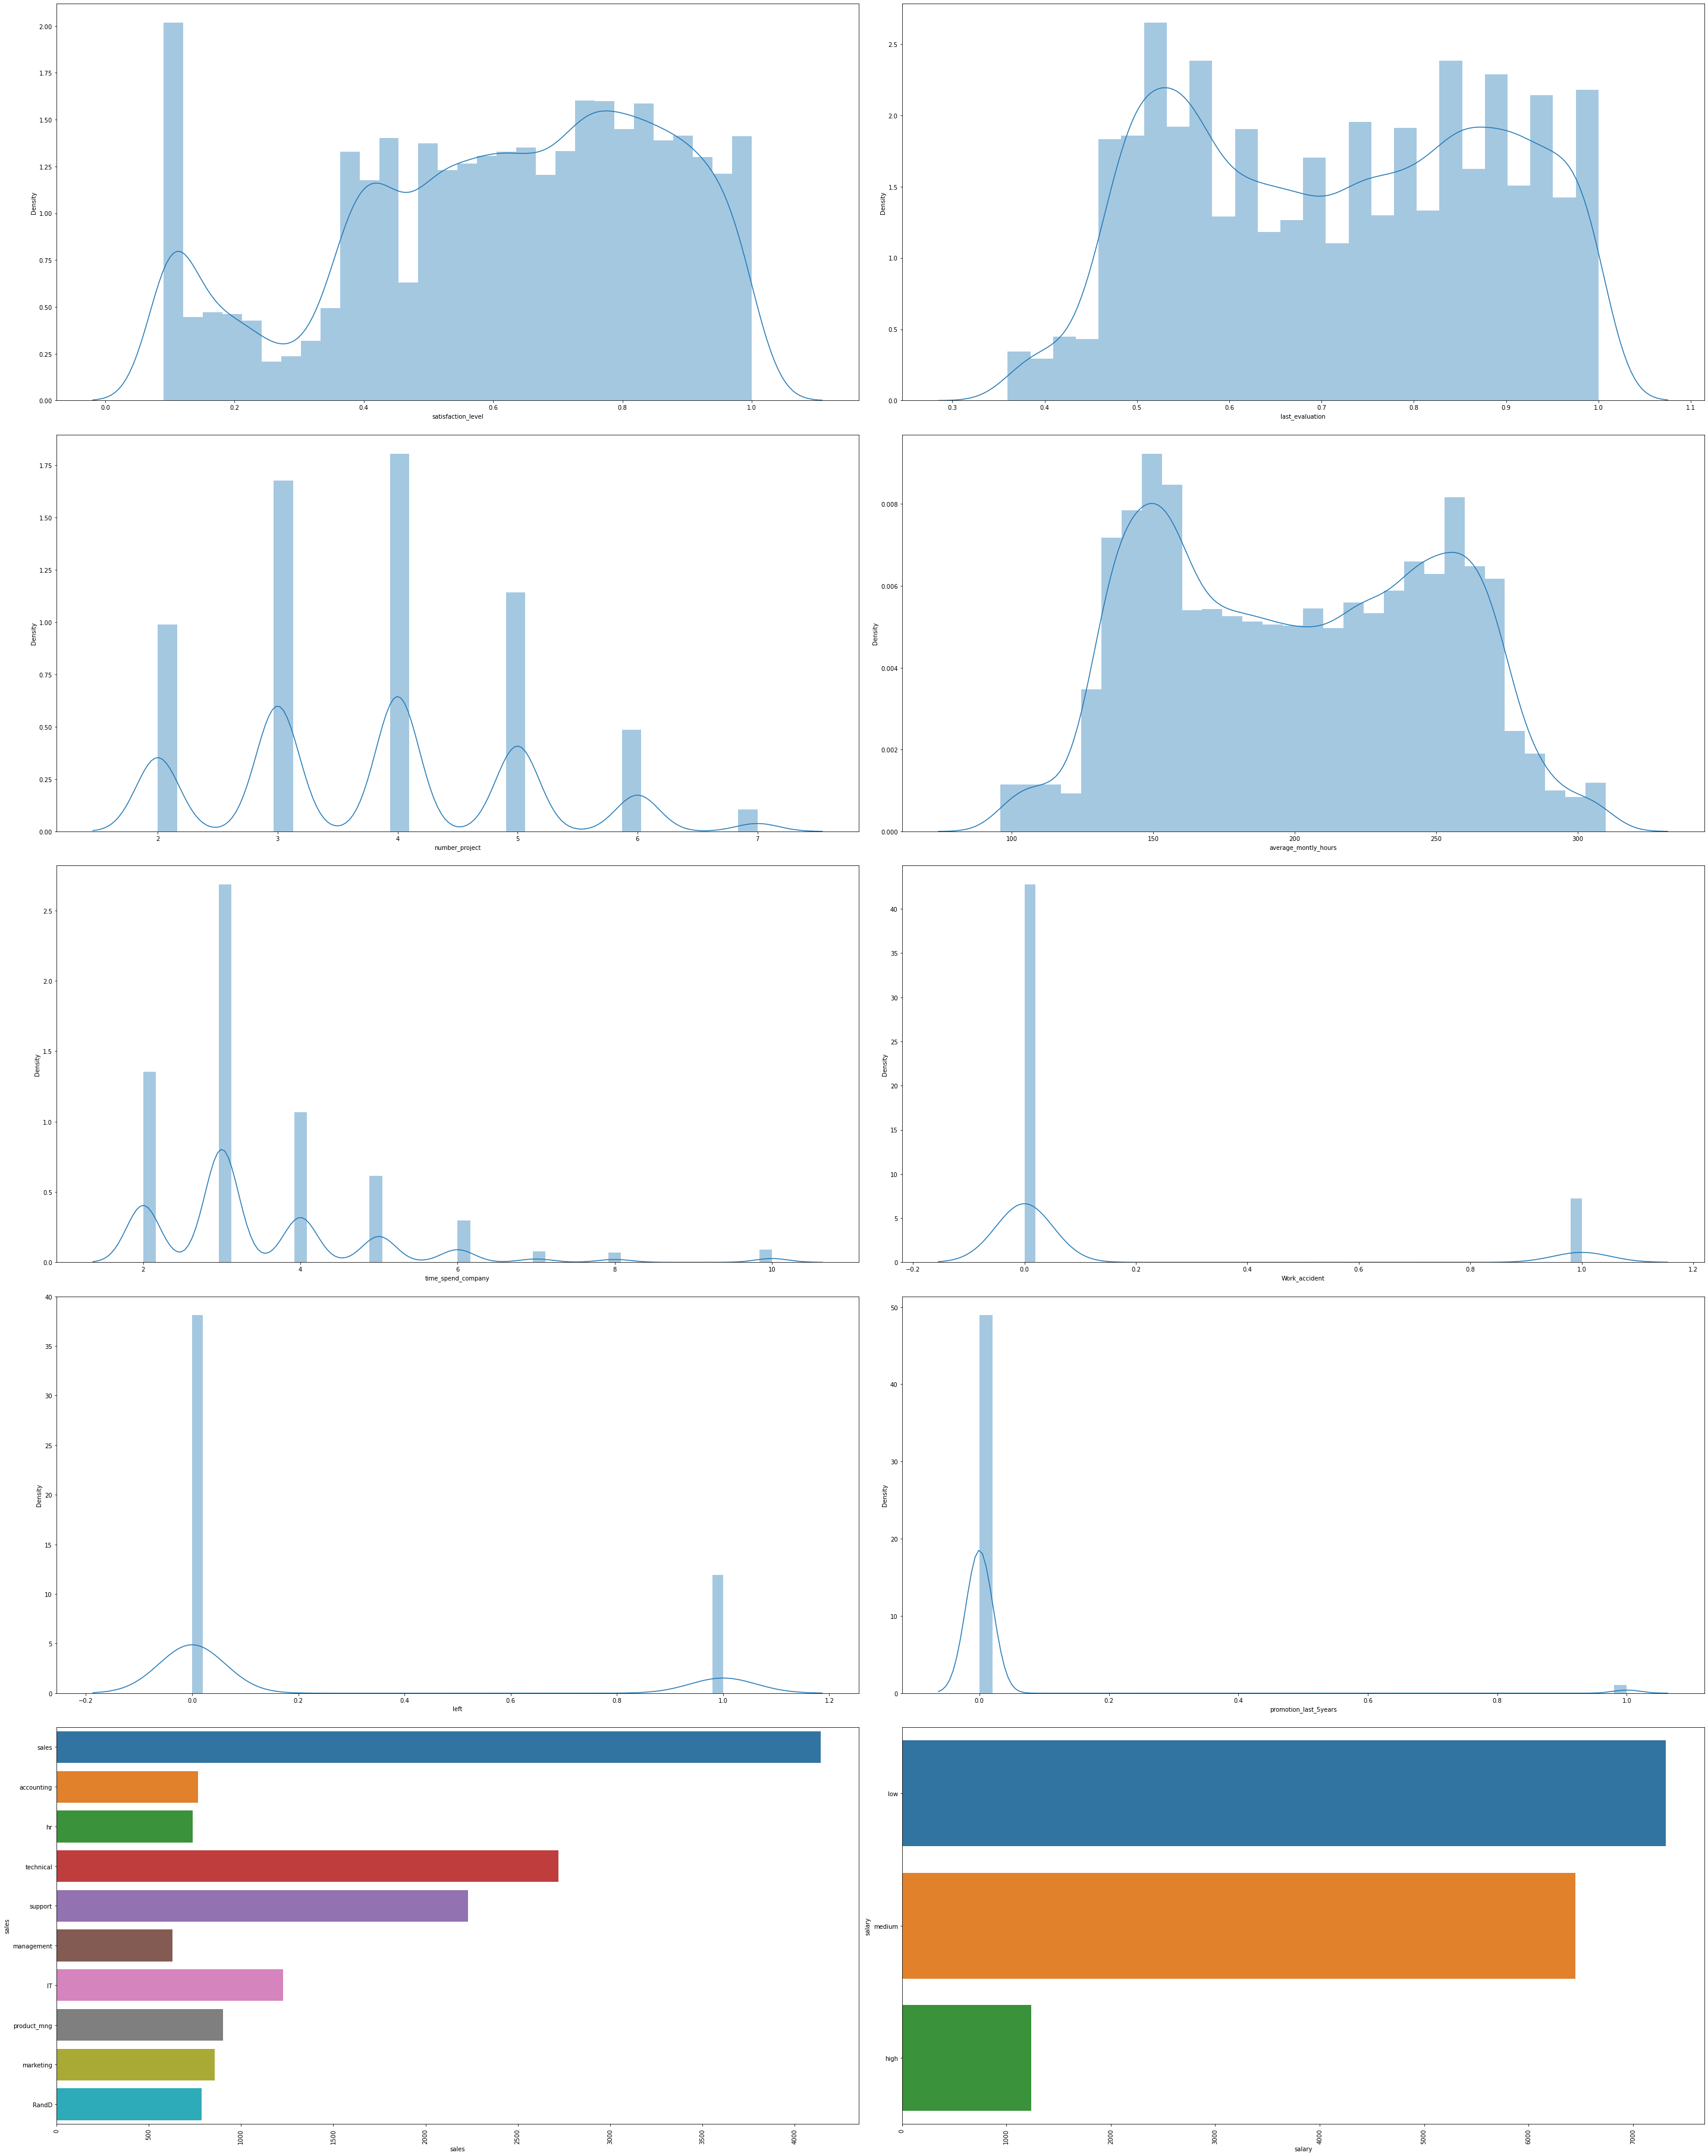

In [7]:
def plot_data(df, row, col):
    plt.figure(figsize=(40,80));
    for i, star in enumerate(df):
        plt.subplot(row,col, i+1)
        if df[star].dtypes == 'object':
            sns.countplot(y=df[star])
            plt.xticks(rotation=90)
            plt.tight_layout();
            plt.xlabel(star);
        else:
            sns.distplot(x=df[star])
            plt.tight_layout();
            plt.xlabel(star);
        
plot_data(df,8,2)

In [8]:
pd.crosstab(df['sales'],df['salary']).style.background_gradient('summer_r')

salary,high,low,medium
sales,,,
IT,83,609,535
RandD,51,364,372
accounting,74,358,335
hr,45,335,359
management,225,180,225
marketing,80,402,376
product_mng,68,451,383
sales,269,2099,1772
support,141,1146,942


# Data Cleansing

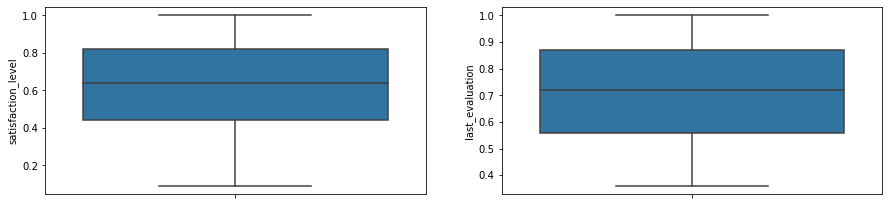

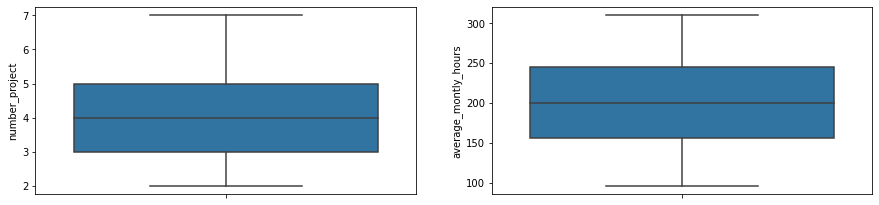

In [9]:
#Checking outliers
def boxplot(x,i):
    plt.subplot(5,2,i)
    sns.boxplot(y=df[x])
plt.figure(figsize=(15,20))    
    
boxplot('satisfaction_level',1)  
boxplot('last_evaluation',2) 

plt.figure(figsize=(15,20))
boxplot('number_project',1)
boxplot('average_montly_hours',2)

In [10]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [11]:
#checking unique values and count of each values
df['number_project'].value_counts() #catogory

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

In [12]:
df['time_spend_company'].value_counts() #catogory

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [13]:
df['Work_accident'].value_counts() #binary

0    12830
1     2169
Name: Work_accident, dtype: int64

In [14]:
df['left'].value_counts() #binary

0    11428
1     3571
Name: left, dtype: int64

In [15]:
df['promotion_last_5years'].value_counts() #binary

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [16]:
df=df.rename(columns={'sales': 'department'})

In [17]:
df['department'].value_counts() #catogory

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [18]:
df['salary'].value_counts() #catogory

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [20]:
#Label Encoding the Salary
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['salary']=le.fit_transform(df['salary'])
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [21]:
#one hot encoding
df=pd.get_dummies(df,drop_first=True )
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


# Train Test Split

In [22]:
# defining dependent and independent variables

# removing the target column salry from x
x = df.drop(['salary'], axis = 1)

y = df['salary']

# checking the shapes
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)


Shape of x: (14999, 17)
Shape of y: (14999,)


In [23]:
# Spliting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)



In [24]:
X_train.shape, y_train.shape

((10049, 17), (10049,))

In [25]:
X_test.shape, y_test.shape

((4950, 17), (4950,))

In [26]:
#Normalisation of X_train with minmax scaler
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
X_train=pd.DataFrame(sc.fit_transform(X_train,y_train ),index=X_train.index,columns=X_train.columns)

X_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
10804,0.626374,0.453125,0.2,0.467290,0.125,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13984,0.923077,0.218750,0.6,0.822430,0.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7971,0.780220,0.640625,0.6,0.747664,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6177,0.692308,0.343750,0.4,0.742991,0.000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10085,0.065934,0.687500,0.6,0.116822,0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [27]:
#Normalisation of X_test with minmax scaler
X_test=pd.DataFrame(sc.transform(X_test),index=X_test.index,columns=X_test.columns)
X_test.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
6723,0.615385,0.937500,0.6,0.607477,0.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6473,0.868132,0.687500,0.2,0.327103,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4679,0.659341,0.968750,0.2,0.551402,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
862,0.351648,0.171875,0.0,0.271028,0.125,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7286,0.857143,0.625000,0.6,0.738318,0.000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# ML Modeling

## Random forest classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import precision_score,accuracy_score,confusion_matrix,f1_score,recall_score

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf_model = rf.fit(X_train,y_train)
predict = rf_model.predict(X_test)

In [29]:
acc_rf = accuracy_score(y_test,predict)
print('Accuracy is :',acc_rf)

Accuracy is : 0.6028282828282828


## Decision tree classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 5,
                          min_samples_leaf= 2, min_samples_split= 3, splitter= 'best',
                          random_state=22,class_weight={0:0.3 , 1:0.7})
dt_model = dt.fit(X_train,y_train)
predict = dt_model.predict(X_test)

In [31]:
acc_dt = accuracy_score(y_test,predict)
print('Accuracy is :',acc_dt)

Accuracy is : 0.4765656565656566


## KNN Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=4)
knn_model = KNN.fit(X_train, y_train)
predict = knn_model.predict(X_test)

In [33]:
acc_knn = accuracy_score(y_test,predict)
print('Accuracy is :',acc_knn)

Accuracy is : 0.5125252525252525


## Gaussian Naive Bayes Algorithm

In [34]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)
predict = gnb_model.predict(X_test)

In [35]:
acc_gnb = accuracy_score(y_test,predict)
print('Accuracy is :',acc_gnb)

Accuracy is : 0.48808080808080806


# Cross Validation

In [36]:
models=["Random Forest Classifier","Decision Tree","KNN","Gaussian Naive Bays"]
Accuracy_Train_Test = [acc_rf,acc_dt,acc_knn,acc_gnb]

score= pd.DataFrame({"Classification Model" :models,"Accuracy Train_Test":Accuracy_Train_Test})
score.sort_values(by= "Accuracy Train_Test",ascending=False).reset_index(drop=True)


,Classification Model,Accuracy Train_Test
0,Random Forest Classifier,0.602828
1,KNN,0.512525
2,Gaussian Naive Bays,0.488081
3,Decision Tree,0.476566


## Fine Tuning

In [37]:
#hyper parameter tuning

print('Parameters currently in use:\n')
print(rf.get_params())

rft=RandomForestClassifier(n_estimators=100,max_depth=1000,random_state=42,criterion='gini')
rft.fit(X_train,y_train)

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


RandomForestClassifier(max_depth=1000, random_state=42)

In [38]:
pred=rft.predict(X_test)
accuracy_score(y_test,pred)
print('Accuracy score is:', accuracy_score(y_test,pred))

Accuracy score is: 0.6028282828282828


In [39]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test , predict))

              precision    recall  f1-score   support

           0       0.22      0.18      0.20       406
           1       0.51      0.88      0.64      2416
           2       0.48      0.10      0.17      2128

    accuracy                           0.49      4950
   macro avg       0.41      0.39      0.34      4950
weighted avg       0.47      0.49      0.40      4950



In [40]:
#feature inportance
def plot_features(columns, importances, n=20):
    df1 = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
# Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df1["features"][:n], df1["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

In [41]:
rft.feature_importances_

array([0.22733067, 0.23114417, 0.06609174, 0.26970316, 0.07060166,
       0.02113297, 0.0107005 , 0.00694496, 0.0088822 , 0.00811572,
       0.00828417, 0.01205426, 0.00933356, 0.00954278, 0.01455006,
       0.01238771, 0.01319971])

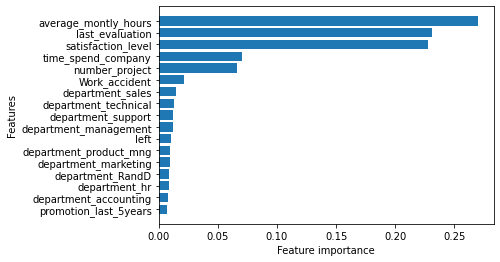

In [42]:
plot_features(X_train.columns,rft.feature_importances_)

In [43]:
pip install explainerdashboard

Note: you may need to restart the kernel to use updated packages.


In [49]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(rft, X_test, y_test)

Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [45]:
from explainerdashboard import InlineExplainer


In [50]:
explainer = ClassifierExplainer(rft, X_test, y_test)


Detected RandomForestClassifier model: Changing class type to RandomForestClassifierExplainer...
Note: model_output=='probability', so assuming that raw shap output of RandomForestClassifier is in probability space...
Generating self.shap_explainer = shap.TreeExplainer(model)


In [61]:
InlineExplainer(explainer).model_stats()

Calculating metrics...
Calculating confusion matrices...
Calculating roc auc curves...
Calculating pr auc curves...
Calculating liftcurve_dfs...


In [62]:
InlineExplainer(explainer).shap.dependence()